# MINI-PROJET STAT INFERENTIELLE

In [409]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import missingno as msno # Visualiser les NaN
from scipy.stats import chi2_contingency# Test de Khy-deux
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest # z-test 
from scipy.stats import shapiro, ttest_ind, bartlett # t-test studen


## Importation et lecture du Jeu de données 

In [132]:
donnees = pd.read_csv("satisfaction_hopital.csv", sep=';')

In [133]:
df = donnees.copy()

In [134]:
df.head()

,service,sexe,age,profession,amelioration.sante,amelioration.moral,recommander,score.relation,"score,information"
0,3,0,41.0,4.0,1.0,0.0,1.0,36.0,22.0
1,3,1,29.0,8.0,2.0,3.0,2.0,33.0,36.0
2,3,1,83.0,2.0,2.0,1.0,2.0,40.0,37.0
3,3,0,66.0,3.0,2.0,0.0,2.0,32.0,35.0
4,3,1,84.0,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   service             534 non-null    int64  
 1   sexe                534 non-null    int64  
 2   age                 528 non-null    float64
 3   profession          427 non-null    float64
 4   amelioration.sante  376 non-null    float64
 5   amelioration.moral  383 non-null    float64
 6   recommander         405 non-null    float64
 7   score.relation      349 non-null    float64
 8   score,information   358 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 37.7 KB


In [136]:
# Renommer les colonnes
df.rename(columns={'amelioration.sante':'AmelioSante', 'amelioration.moral':'AmelioMorale', 
                   'score.relation':'ScoreRelation', 'score,information':'ScoreInfo'}, inplace=True)

In [137]:
df.head()

,service,sexe,age,profession,AmelioSante,AmelioMorale,recommander,ScoreRelation,ScoreInfo
0,3,0,41.0,4.0,1.0,0.0,1.0,36.0,22.0
1,3,1,29.0,8.0,2.0,3.0,2.0,33.0,36.0
2,3,1,83.0,2.0,2.0,1.0,2.0,40.0,37.0
3,3,0,66.0,3.0,2.0,0.0,2.0,32.0,35.0
4,3,1,84.0,NaN,NaN,NaN,NaN,NaN,NaN


## Changer le type des colonnes

In [172]:
col = ['service', 'sexe', 'profession', 'AmelioSante', 'AmelioMorale', 'recommander']
for nom in col: 
    df[nom]=df[nom].astype('category')

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   service        534 non-null    category
 1   sexe           534 non-null    category
 2   age            528 non-null    float64 
 3   profession     427 non-null    category
 4   AmelioSante    376 non-null    category
 5   AmelioMorale   383 non-null    category
 6   recommander    405 non-null    category
 7   ScoreRelation  349 non-null    float64 
 8   ScoreInfo      358 non-null    float64 
dtypes: category(6), float64(3)
memory usage: 17.1 KB


In [174]:
df.describe(include='category')

,service,sexe,profession,AmelioSante,AmelioMorale,recommander
count,534,534,427.0,376.0,383.0,405.0
unique,8,2,8.0,4.0,4.0,3.0
top,5,0,3.0,3.0,1.0,2.0
freq,71,268,124.0,161.0,179.0,269.0


In [175]:
df.describe()

,age,ScoreRelation,ScoreInfo
count,528.000000,349.000000,358.000000
mean,58.212121,35.217765,31.910615
std,17.809249,4.623606,6.793295
min,18.000000,13.000000,13.000000
25%,45.000000,33.000000,28.000000
50%,60.000000,36.000000,33.000000
75%,72.000000,39.000000,38.000000
max,97.000000,40.000000,40.000000


## Visualisation des NaN

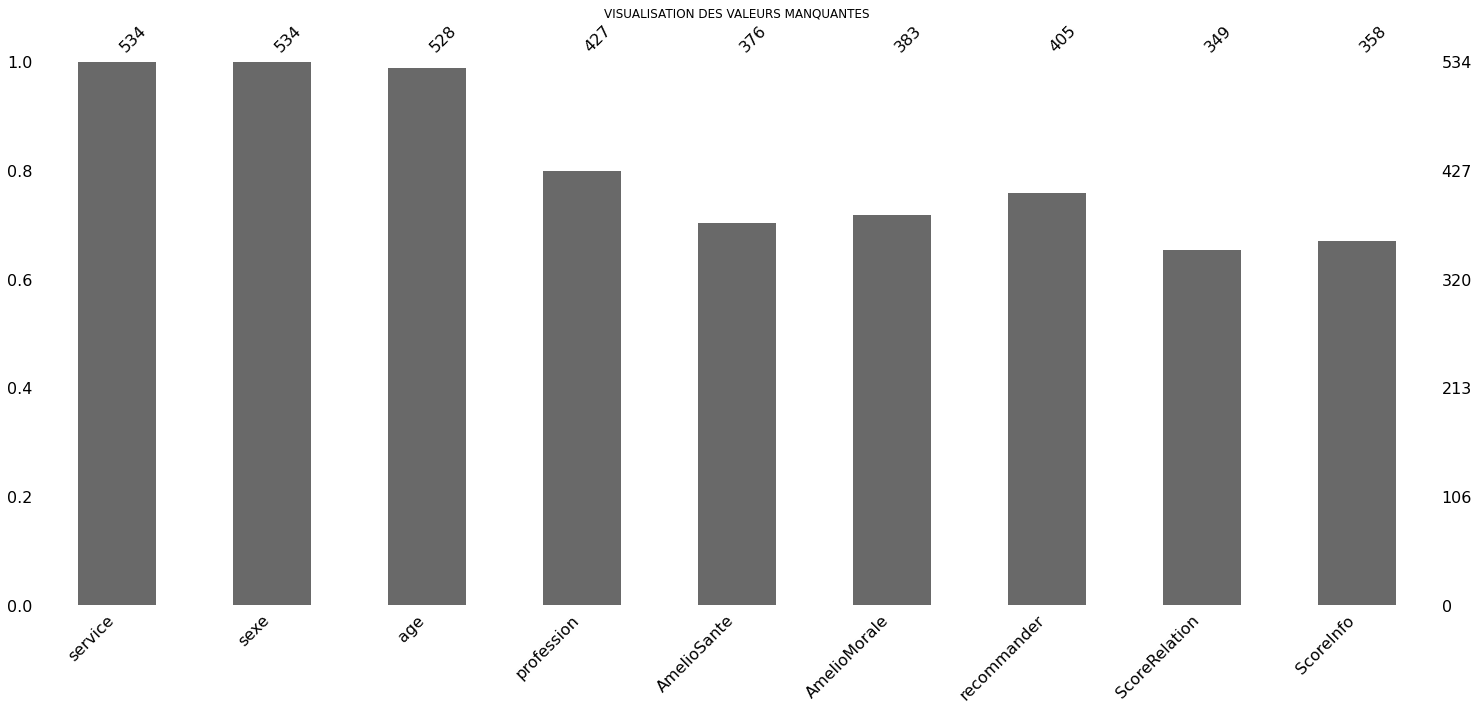

In [176]:
msno.bar(df)
plt.title('VISUALISATION DES VALEURS MANQUANTES')
plt.show()

In [144]:
# msno.matrix(df)
# plt.title('VISUALISATION DES VALEURS MANQUANTES')
# plt.show()

In [145]:
# msno.heatmap(df)
# plt.title('VISUALISATION DES VALEURS MANQUANTES')
# plt.show()

## Traitement des valeurs manquantes 

In [177]:
# Comptage des NaN
df.isna().sum()

service            0
sexe               0
age                6
profession       107
AmelioSante      158
AmelioMorale     151
recommander      129
ScoreRelation    185
ScoreInfo        176
dtype: int64

In [178]:
# Pourcentage des NaN
round(df.isna().mean(), 2)*100

service           0.0
sexe              0.0
age               1.0
profession       20.0
AmelioSante      30.0
AmelioMorale     28.0
recommander      24.0
ScoreRelation    35.0
ScoreInfo        33.0
dtype: float64

In [95]:
# # Changement des types des variables
# col = ['service', 'sexe', 'profession', 'AmelioSante', 'AmelioMorale', 'recommander']
# for nom in col: 
#     df[nom]=df[nom].astype('int')

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   service        534 non-null    category
 1   sexe           534 non-null    category
 2   age            528 non-null    float64 
 3   profession     427 non-null    category
 4   AmelioSante    376 non-null    category
 5   AmelioMorale   383 non-null    category
 6   recommander    405 non-null    category
 7   ScoreRelation  349 non-null    float64 
 8   ScoreInfo      358 non-null    float64 
dtypes: category(6), float64(3)
memory usage: 17.1 KB


In [206]:
# import the KNNimputer class
from sklearn.impute import KNNImputer

In [207]:
# create an object for KNNImputer
imputer = KNNImputer(n_neighbors=10)

In [208]:
# Imputation
dfImputer = imputer.fit_transform(df)

In [209]:
dfSansNan = pd.DataFrame(dfImputer)
dfSansNan.head()

,0,1,2,3,4,5,6,7,8
0,3.0,0.0,41.0,4.0,1.0,0.0,1.0,36.0,22.0
1,3.0,1.0,29.0,8.0,2.0,3.0,2.0,33.0,36.0
2,3.0,1.0,83.0,2.0,2.0,1.0,2.0,40.0,37.0
3,3.0,0.0,66.0,3.0,2.0,0.0,2.0,32.0,35.0
4,3.0,1.0,84.0,4.5,2.5,1.1,1.8,37.2,30.3


In [210]:
dfSansNan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       534 non-null    float64
 1   1       534 non-null    float64
 2   2       534 non-null    float64
 3   3       534 non-null    float64
 4   4       534 non-null    float64
 5   5       534 non-null    float64
 6   6       534 non-null    float64
 7   7       534 non-null    float64
 8   8       534 non-null    float64
dtypes: float64(9)
memory usage: 37.7 KB


In [211]:
# Renommer les colonnes
dfSansNan.rename(columns={0:'service', 1:'sexe', 2:'age', 3:'profession', 4:'AmelioSante', 5:'AmelioMorale', 6:'recommander', 
                   7:'ScoreRelation', 8:'ScoreInfo'}, inplace=True)

In [213]:
dfSansNan.head()

,service,sexe,age,profession,AmelioSante,AmelioMorale,recommander,ScoreRelation,ScoreInfo
0,3.0,0.0,41.0,4.0,1.0,0.0,1.0,36.0,22.0
1,3.0,1.0,29.0,8.0,2.0,3.0,2.0,33.0,36.0
2,3.0,1.0,83.0,2.0,2.0,1.0,2.0,40.0,37.0
3,3.0,0.0,66.0,3.0,2.0,0.0,2.0,32.0,35.0
4,3.0,1.0,84.0,4.5,2.5,1.1,1.8,37.2,30.3


In [216]:
# Changement des types des variables
col = ['service', 'sexe', 'profession', 'AmelioSante', 'AmelioMorale', 'recommander']
for nom in col: 
    dfSansNan[nom]=dfSansNan[nom].astype('category')

In [217]:
dfSansNan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   service        534 non-null    category
 1   sexe           534 non-null    category
 2   age            534 non-null    float64 
 3   profession     534 non-null    category
 4   AmelioSante    534 non-null    category
 5   AmelioMorale   534 non-null    category
 6   recommander    534 non-null    category
 7   ScoreRelation  534 non-null    float64 
 8   ScoreInfo      534 non-null    float64 
dtypes: category(6), float64(3)
memory usage: 19.2 KB


In [218]:
# Verification des NaN
dfSansNan.isna().sum()

service          0
sexe             0
age              0
profession       0
AmelioSante      0
AmelioMorale     0
recommander      0
ScoreRelation    0
ScoreInfo        0
dtype: int64

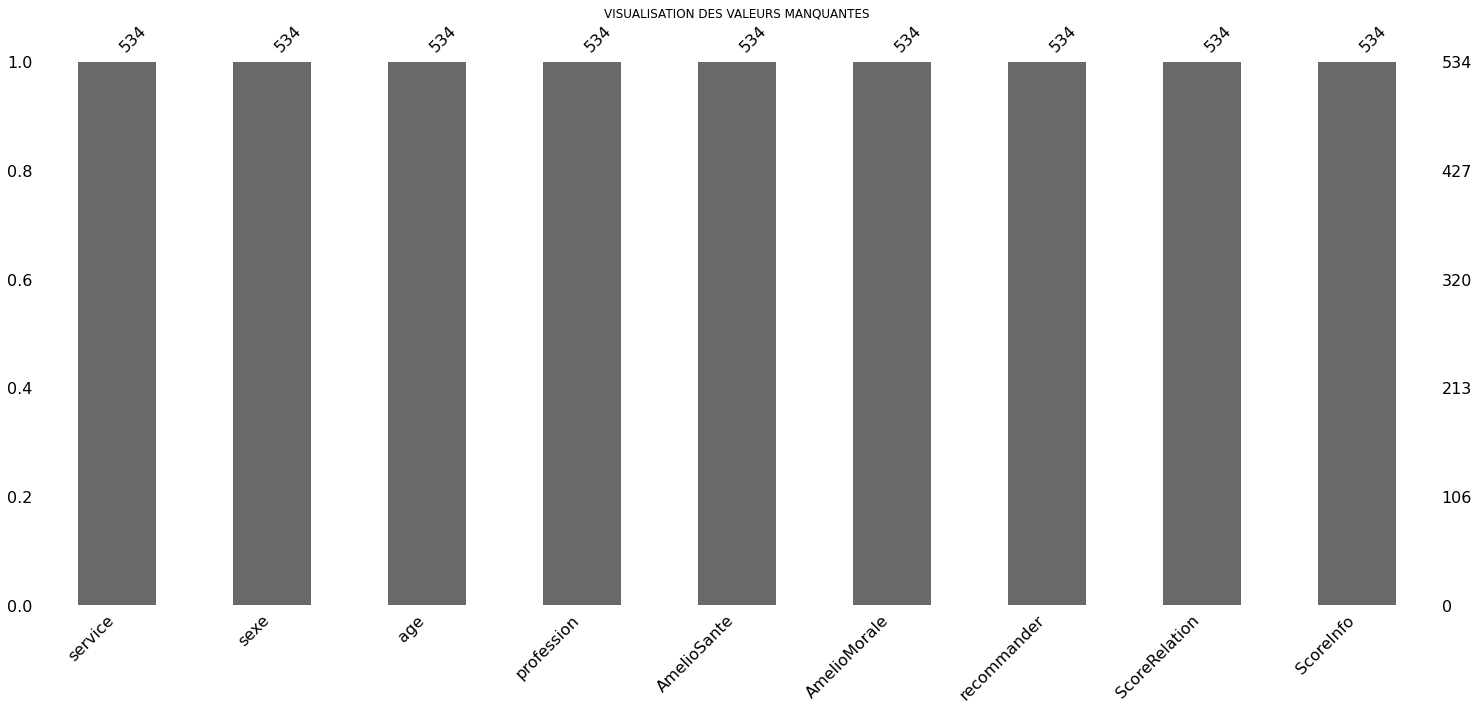

In [219]:
# Visualisation des NaN
msno.bar(dfSansNan)
plt.title('VISUALISATION DES VALEURS MANQUANTES')
plt.show()

## Traitement des doublons

In [220]:
#Comptage du nombre de doublon
len(dfSansNan[dfSansNan.duplicated()])

12

In [254]:
#Suppression des doublons
dfOk=dfSansNan.drop_duplicates()

In [266]:
dfOk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 522 entries, 0 to 533
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   service        522 non-null    int32  
 1   sexe           522 non-null    int32  
 2   age            522 non-null    float64
 3   profession     522 non-null    int32  
 4   AmelioSante    522 non-null    int32  
 5   AmelioMorale   522 non-null    int32  
 6   recommander    522 non-null    int32  
 7   ScoreRelation  522 non-null    float64
 8   ScoreInfo      522 non-null    float64
dtypes: float64(3), int32(6)
memory usage: 28.5 KB


In [268]:
# Changement des types des variables
col = ['service', 'sexe', 'profession', 'AmelioSante', 'AmelioMorale', 'recommander']
for nom in col: 
    dfOk.loc[:, nom]=dfOk.loc[:, nom].astype('int')

C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_13120\252588879.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfOk.loc[:, nom]=dfOk.loc[:, nom].astype('int')


In [279]:
# Changement des types des variables
col = ['service', 'sexe', 'profession', 'AmelioSante', 'AmelioMorale', 'recommander']
for nom in col: 
    dfOk.loc[:, (nom)]=dfOk.loc[:, (nom)].astype('category')

C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_13120\1663260493.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfOk.loc[:, (nom)]=dfOk.loc[:, (nom)].astype('category')
C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_13120\1663260493.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfOk.loc[:, (nom)]=dfOk.loc[:, (nom)].astype('category')
C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_13120\1663260493.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [ ]:
dfOk[]

In [263]:
# dfOk.describe(include='category')
dfOk['sexe'].dtype

CategoricalDtype(categories=[0.0, 1.0], ordered=False)

In [253]:
liste = ["Homme", "Femme"]

for genre in liste:
    for num in dfOk['sexe'].unique():
        print(num)
#         dfOk['sexe'] = dfOk['sexe'].replace({num: genre})

# Afficher le résultat final
# print(dfOk['sexe'])

0.0
1.0
0.0
1.0


In [245]:
dfOk['sexe'].unique()

['Femme']
Categories (1, object): ['Femme']

In [244]:
dfOk['sexe'].describe()

count       522
unique        1
top       Femme
freq        522
Name: sexe, dtype: object

In [236]:
len(dfOk[dfOk.duplicated()])

0

## Traitement des valeurs aberrantes

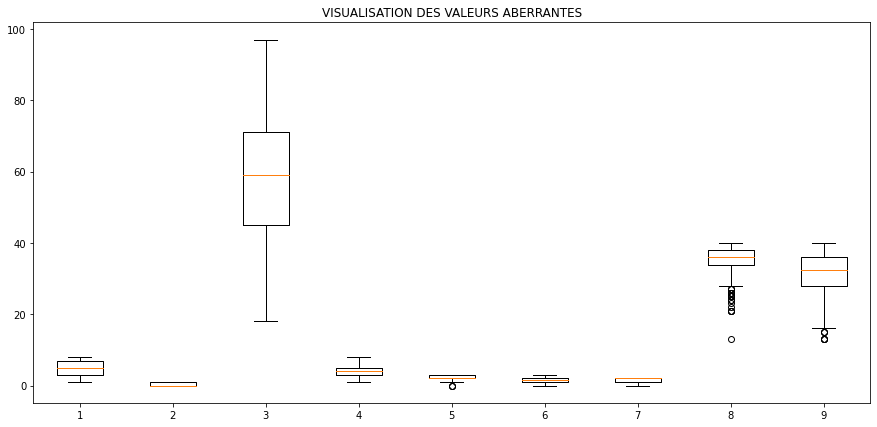

In [237]:
plt.figure(figsize=(15, 7))
plt.boxplot(dfOk)
plt.title('VISUALISATION DES VALEURS ABERRANTES')
plt.xticks()
plt.show() 

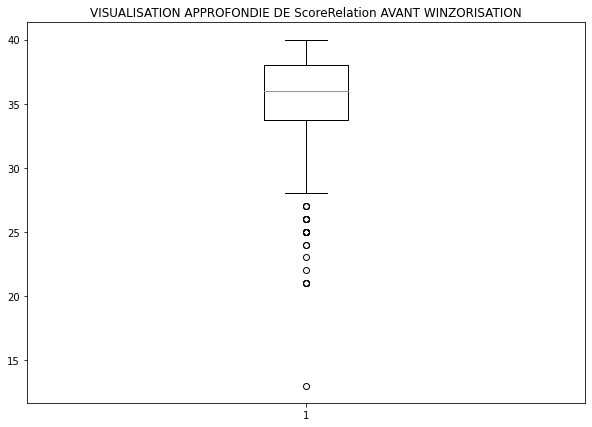

In [238]:
plt.figure(figsize=(10, 7))
plt.boxplot(dfOk['ScoreRelation'])
plt.title('VISUALISATION APPROFONDIE DE ScoreRelation AVANT WINZORISATION')
plt.show() 

In [239]:
from scipy.stats.mstats import winsorize # Pour Winzorizer

In [240]:
dfOk.loc[:,('ScoreRelation')]

0      36.0
1      33.0
2      40.0
3      32.0
4      37.2
       ... 
529    35.4
530    35.3
531    32.0
532    30.0
533    36.0
Name: ScoreRelation, Length: 522, dtype: float64

In [241]:
dfOk.loc[:,('ScoreRelation')] = winsorize(dfOk.loc[:,('ScoreRelation')], (0.05,0.05))

C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_13120\1174329566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfOk.loc[:,('ScoreRelation')] = winsorize(dfOk.loc[:,('ScoreRelation')], (0.05,0.05))


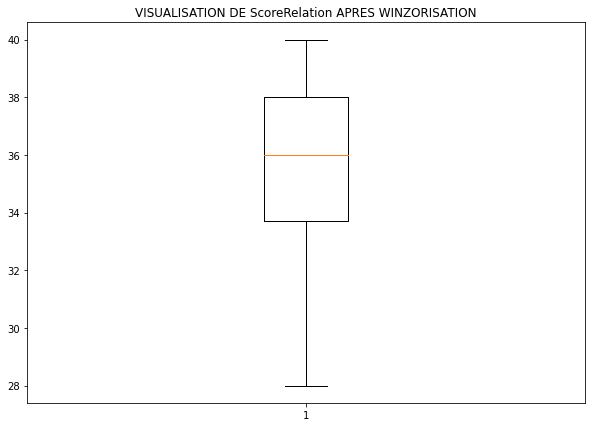

In [242]:
plt.figure(figsize=(10, 7))
plt.boxplot(dfOk['ScoreRelation'])
plt.title('VISUALISATION DE ScoreRelation APRES WINZORISATION')
plt.show()

# II- Statistique Inferentielle

## 1- Tests de comparaison de deux proportions

### a- *La proportion de sujets recommandant le service dans lequel ils sont passés est-il le même quel que soit le genre ?*


#### Selection et recodage des variables d'intérêt 

In [330]:
# Modalité genre
sexe = dfOk['sexe']

# Modalité recommander
recommander = dfOk['recommander']

In [331]:
# Recoder les modalités
# sexe = sexe.astype('category')
sexe = sexe.replace({0:'homme', 1:'femme'})
print(sexe.head())

0    homme
1    femme
2    femme
3    homme
4    femme
Name: sexe, dtype: category
Categories (2, object): ['homme', 'femme']


In [338]:
# Recoder les modalités
recommander = recommander.replace({0:'Non', 1:'Oui, probablement', 2:'Oui, sûrement'})
print(recommander.head())

0    Oui, probablement
1        Oui, sûrement
2        Oui, sûrement
3        Oui, sûrement
4    Oui, probablement
Name: recommander, dtype: category
Categories (3, object): ['Non', 'Oui, probablement', 'Oui, sûrement']


#### Effectifs et tableau de contingence 

In [337]:
# Afficher les effectifs par modalité 
Effsexe = sexe.value_counts().reset_index().rename(columns={'index':'sexe', 'sexe':'nombre' }).set_index('sexe')
print(Effsexe)

       nombre
sexe         
homme     262
femme     260


In [341]:
# Afficher les effectifs par modalité 
Effrecom = recommander.value_counts().reset_index().rename(columns={'index':'recommandation', 'recommander':'nombre' }).set_index('recommandation')
print(Effrecom)

                   nombre
recommandation           
Oui, sûrement         273
Oui, probablement     233
Non                    16


In [347]:
# Tableau de contingence
tableau = pd.crosstab(recommander, sexe)
print(tableau)

sexe               homme  femme
recommander                    
Non                   10      6
Oui, probablement    112    121
Oui, sûrement        140    133


In [379]:
# Tableau des effectifs marginaux
margeCol = tableau.sum(axis=0)


#### Les hypothèses

#### Les Conditions 

##### a- L'Independance des deux groupes

In [353]:
# Visualisation de l'indépendance  QQplot

sm.qqplot(recommander, line='45', fit=True)
plt.title('QQ Plot')
plt.show()

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

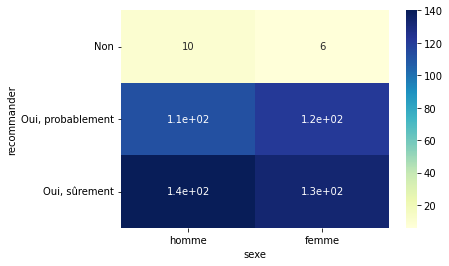

In [355]:
sns.heatmap(tableau, annot=True, cmap="YlGnBu")
plt.show()

In [368]:
# Test d'Independance pour la variable sexe

# Effectuer le test du Chi-2
chi2_stat, p_value, dof, expected = chi2_contingency(Effsexe)

# Imprimer les résultats
print(f"Statistique de test du Chi-2 : {chi2_stat}")
print(f"Valeur p : {p_value}")
print(f"Degrés de liberté : {dof}")
print("Tableau de fréquences attendues :")
print(expected)

# Interpréter les résultats
alpha = 0.05
if p_value < alpha:
    print("On rejette l'hypothèse nulle. Les variables ne sont pas indépendantes.")
else:
    print("On ne rejette pas l'hypothèse nulle. Les variables sont indépendantes.")

Statistique de test du Chi-2 : 0.0
Valeur p : 1.0
Degrés de liberté : 0
Tableau de fréquences attendues :
[[262.]
 [260.]]
On ne rejette pas l'hypothèse nulle. Les variables sont indépendantes.


In [369]:
# Test d'Independance pour la variable recommander

# Effectuer le test du Chi-2
chi2_stat, p_value, dof, expected = chi2_contingency(Effrecom)

# Imprimer les résultats
print(f"Statistique de test du Chi-2 : {chi2_stat}")
print(f"Valeur p : {p_value}")
print(f"Degrés de liberté : {dof}")
print("Tableau de fréquences attendues :")
print(expected)

# Interpréter les résultats
alpha = 0.05
if p_value < alpha:
    print("On rejette l'hypothèse nulle. Les variables ne sont pas indépendantes.")
else:
    print("On ne rejette pas l'hypothèse nulle. Les variables sont indépendantes.")

Statistique de test du Chi-2 : 0.0
Valeur p : 1.0
Degrés de liberté : 0
Tableau de fréquences attendues :
[[273.]
 [233.]
 [ 16.]]
On ne rejette pas l'hypothèse nulle. Les variables sont indépendantes.


In [349]:
# Test d'Independance pour les variables catégorielles

# Effectuer le test du Chi-2
chi2_stat, p_value, dof, expected = chi2_contingency(tableau)

# Imprimer les résultats
print(f"Statistique de test du Chi-2 : {chi2_stat}")
print(f"Valeur p : {p_value}")
print(f"Degrés de liberté : {dof}")
print("Tableau de fréquences attendues :")
print(expected)

# Interpréter les résultats
alpha = 0.05
if p_value < alpha:
    print("On rejette l'hypothèse nulle. Les variables ne sont pas indépendantes.")
else:
    print("On ne rejette pas l'hypothèse nulle. Les variables sont indépendantes.")

Statistique de test du Chi-2 : 1.5194861349100022
Valeur p : 0.4677866011728772
Degrés de liberté : 2
Tableau de fréquences attendues :
[[  8.03065134   7.96934866]
 [116.94636015 116.05363985]
 [137.02298851 135.97701149]]
On ne rejette pas l'hypothèse nulle. Les variables sont indépendantes.


##### b- La normalité des deux groupes

##### c- Z-test

In [380]:
# Effectuer le test Z pour les proportions
stat, p_value = proportions_ztest(tableau['femme'], tableau['homme'])

# Imprimer les résultats
print(f"Statistique de test Z : {stat}")
print(f"Valeur p : {p_value}")

# Interpréter les résultats
alpha = 0.05
if p_value < alpha:
    print("On rejette l'hypothèse nulle. Il y a une différence significative entre les proportions.")
else:
    print("On ne rejette pas l'hypothèse nulle. Il n'y a pas de différence significative entre les proportions.")

NotImplementedError: more than two samples are not implemented yet

##### c- Aternative test de Khy-deux

In [381]:
# Effectuer le test du Chi-2
chi2_stat, p_value, dof, expected = chi2_contingency(tableau)

# Imprimer les résultats
print(f"Statistique de test du Chi-2 : {chi2_stat}")
print(f"Valeur p : {p_value}")
print(f"Degrés de liberté : {dof}")
print("Tableau de fréquences attendues :")
print(expected)

# Interpréter les résultats
alpha = 0.05
if p_value < alpha:
    print("On rejette l'hypothèse nulle. Il y a une différence significative entre les proportions.")
else:
    print("On ne rejette pas l'hypothèse nulle. Il n'y a pas de différence significative entre les proportions.")

Statistique de test du Chi-2 : 1.5194861349100022
Valeur p : 0.4677866011728772
Degrés de liberté : 2
Tableau de fréquences attendues :
[[  8.03065134   7.96934866]
 [116.94636015 116.05363985]
 [137.02298851 135.97701149]]
On ne rejette pas l'hypothèse nulle. Il n'y a pas de différence significative entre les proportions.


### b- *La moyenne du score de relation est-il significativement différent chez les hommes et chez les femmes ?*


#### Selection et recodage des variables d'intérêt 

In [396]:
# Modalité genre
sexe = dfOk['sexe']

# Modalité Scorerelation
relation = dfOk['ScoreRelation']

In [401]:
# Recoder les modalités
# sexe = sexe.astype('category')
df.sexe = sexe.replace({0:'homme', 1:'femme'})
print(sexe.head())

0    homme
1    femme
2    femme
3    homme
4    femme
Name: sexe, dtype: category
Categories (2, object): ['homme', 'femme']


#### 1- Comparaison graphique des sous-populations  

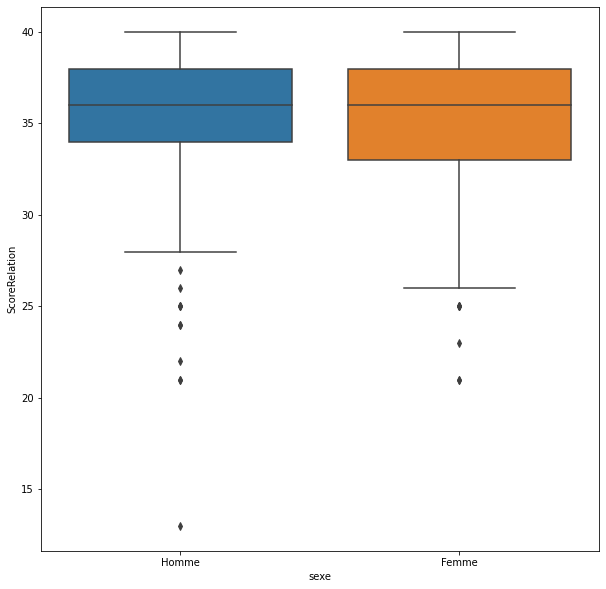

In [402]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=dfOk, x='sexe', y='ScoreRelation')
plt.xticks([0, 1], ['Homme', 'Femme'])
plt.show()

#### 2- Stat de base des sous-populations  

In [403]:
means = dfOk.groupby('sexe')['ScoreRelation'].mean()
print('Les moyennes de Score relation par Sexe sont: \n', means)

ecartp = dfOk.groupby('sexe')['ScoreRelation'].std()
print('Les ecarts-types de Score relation par Sexe sont: \n', ecartp)

Les moyennes de Score relation par Sexe sont: 
 sexe
0    35.488168
1    35.162692
Name: ScoreRelation, dtype: float64
Les ecarts-types de Score relation par Sexe sont: 
 sexe
0    3.879879
1    3.866043
Name: ScoreRelation, dtype: float64


#### 3- Test de normalite dans chaque sous-populations  

In [404]:
for sexe in dfOk['sexe'].unique():
    stat, p = shapiro(dfOk['ScoreRelation'][dfOk['sexe'] == sexe]) 
    print(f"Shapiro test pour la modalité {sexe}: Statistic={stat:.5f}, P-value={p:.5f}") 

Shapiro test for 0: Statistic=0.85677, P-value=0.00000
Shapiro test for 1: Statistic=0.91571, P-value=0.00000


#### 4- Tester l’égalité des variances 

In [413]:
groups = [dfOk['ScoreRelation'][dfOk['sexe'] == sexe] for sexe in dfOk['sexe'].unique()] 
stat, p = bartlett(*groups) 

print(f"\nBartlett test: Statistic={stat:.5f}, P-value={p:.5f}")

alpha = 0.05
if p > alpha:
    print("On ne rejette pas H0, l'egalite des variances est vérifiée.")
else :
    print("On rejette H0, la variance est differente d une sous-pop à l'autre.")


Bartlett test: Statistic=0.00331, P-value=0.95411
On ne rejette pas H0, l'egalite des variances est vérifiée.


#### 5- Tester la significativité du facteur: tester l’égalité des moyennes

In [417]:
model = sm.OLS('ScoreRelation ~ sexe', data=dfOk).fit() 
anova_table = sm.stats.anova_lm(model, typ=2) 
print("\nANOVA results:") 

print(anova_table)  

ValueError: unrecognized data structures: <class 'str'> / <class 'NoneType'>

In [419]:
import statsmodels.api as sm

# Assurez-vous que 'sexe' est une variable catégorielle avec des variables indicatrices (dummy variables)
dfOk = pd.get_dummies(dfOk, columns=['sexe'], drop_first=True)

# Modèle OLS avec 'sexe' comme variable indépendante
model = sm.OLS.from_formula('ScoreRelation ~ sexe', data=dfOk).fit()

# Tableau ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Imprimer les résultats
print("\nANOVA results:")
print(anova_table)

KeyError: "None of [Index(['sexe'], dtype='object')] are in the [columns]"

### Variable age

In [269]:
age = dfOk.loc[:, 'age']


0    41.0
1    29.0
2    83.0
3    66.0
4    84.0
Name: age, dtype: float64

C:\Users\THINKPAD\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


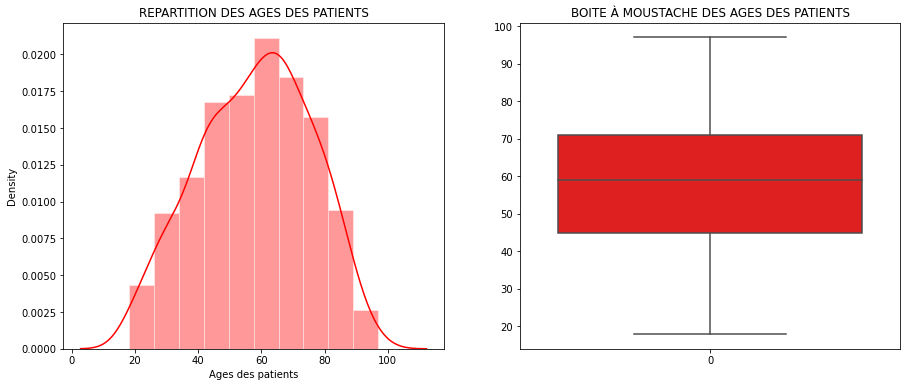

In [47]:
# Histogramme
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.distplot(a=age, bins=10, color='red',
             hist_kws={"edgecolor": 'white'})
plt.xlabel('Ages des patients')
plt.title("REPARTITION DES AGES DES PATIENTS")

# Boîte à moustaches 
plt.subplot(122)
sns.boxplot(data=age, color='red')
# plt.xlabel('Ages des patients')
plt.title("BOITE À MOUSTACHE DES AGES DES PATIENTS")
plt.show()

In [48]:
# Test de normalité
stats.normaltest(age)

NormaltestResult(statistic=30.938546800468213, pvalue=1.9132861301853655e-07)

In [49]:
# Resumé stat de l'age
round(age.describe(), 0)

count    522.0
mean      58.0
std       18.0
min       18.0
25%       45.0
50%       59.0
75%       71.0
max       97.0
Name: age, dtype: float64

In [50]:
age.skew()

-0.16862279829393007

In [51]:
age.kurtosis()

-0.7189577831487912

In [52]:
TabEffAge = age.value_counts().reset_index().rename(columns={'index':'Age', 'age':'Nombre'})

In [53]:
TabEffAge.sort_values(by='Age').head()

,Age,Nombre
62,18.0,3
72,19.0,2
69,20.0,2
57,21.0,3
65,22.0,3


### Variable ScoreRelation

In [54]:
ScoreRelation = dfOk.loc[:, 'ScoreRelation']

C:\Users\THINKPAD\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


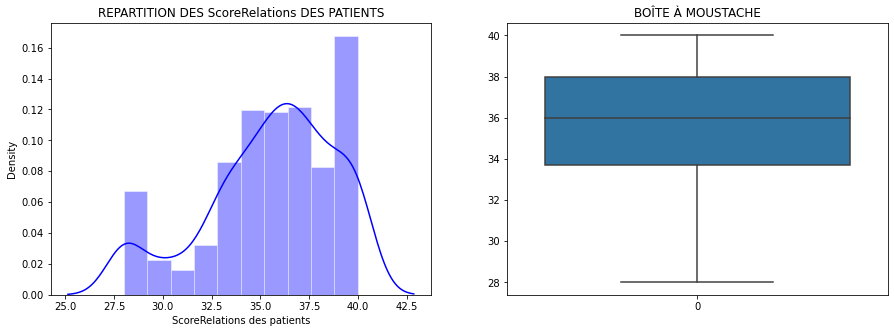

In [55]:
# Histogramme
plt.figure(figsize=(15,5))
plt.subplot(121)
# sns.histplot(ScoreRelation)
sns.distplot(a=ScoreRelation, bins=10, color='blue',
             hist_kws={"edgecolor": 'white'})
plt.xlabel('ScoreRelations des patients')
plt.title("REPARTITION DES ScoreRelations DES PATIENTS")

# Boîte à moustaches 
plt.subplot(122)
sns.boxplot(data=ScoreRelation)
# plt.xlabel('Score des patients')
plt.title("BOÎTE À MOUSTACHE")
plt.show()

In [56]:
#Fonction pour faire le test de Normalité 

res = [0, 0, 0]

for col in dfOk.columns:
    if dfOk[col].dtype == 'float64':
        for i in range(3):
            res[i] = stats.normaltest(dfOk[col]).pvalue
        print(f"La p-value de _{col}_ est: {res[0]}")
        
if (res[0]>0.05)==True:
    print("On accepte H0, la distribution est normale.")
else:
    print("On rejette H0, la distribution n'est pas normale.")

La p-value de _age_ est: 1.9132861301853655e-07
La p-value de _ScoreRelation_ est: 2.6384468784958472e-08
La p-value de _ScoreInfo_ est: 2.5309664767507705e-09
On rejette H0, la distribution n'est pas normale.


In [57]:
res = []

for col in dfOk.columns:
    if dfOk[col].dtype == 'float64':
        p_values = [stats.normaltest(dfOk[col]).pvalue]
        res.append((col, p_values))

for col, p_values in res:
    print(f"La p-value du test de normalité pour la colonne {col} est : {p_values}")

    if all(p_value > 0.05 for p_value in p_values):
        print(f"On accepte H0 pour la colonne {col}, la distribution est normale.\n")
    else:
        print(f"On rejette H0 pour la colonne {col}, la distribution n'est pas normale.\n")


La p-value du test de normalité pour la colonne age est : [1.9132861301853655e-07]
On rejette H0 pour la colonne age, la distribution n'est pas normale.

La p-value du test de normalité pour la colonne ScoreRelation est : [2.6384468784958472e-08]
On rejette H0 pour la colonne ScoreRelation, la distribution n'est pas normale.

La p-value du test de normalité pour la colonne ScoreInfo est : [2.5309664767507705e-09]
On rejette H0 pour la colonne ScoreInfo, la distribution n'est pas normale.



In [58]:
# Resumé stat de l'age
round(ScoreRelation.describe(), 0)

count    522.0
mean      36.0
std        3.0
min       28.0
25%       34.0
50%       36.0
75%       38.0
max       40.0
Name: ScoreRelation, dtype: float64

In [104]:
round(ScoreRelation.skew(), 2)

-0.68

In [129]:
def stat_descriptive(tableau):
    
    resume_stat = print("Les statistiques descriptives sont: \n", round(tableau.describe(), 2), "\n")
    skewness = print("Le skewness est:", round(tableau.skew(), 2), "\n")
    kurto = print("Le kurtosis est :", round(tableau.kurtosis(), 2), "\n")
    
    return(resume_stat, skewness, kurto);

In [130]:
stat_descriptive(ScoreRelation)

Les statistiques descriptives sont: 
 count    522.00
mean      35.51
std        3.33
min       28.00
25%       33.70
50%       36.00
75%       38.00
max       40.00
Name: ScoreRelation, dtype: float64 

Le skewness est: -0.68 

Le kurtosis est : -0.19 



(None, None, None)